# Validate and clean your data

## Introduction

In this activity, we will use input validation and label encoding to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks. 

In this activity scenario, where I am a data professional an investment firm that is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." My client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies. They are particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. 

## Step 1: Imports 

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, and `pyplot` from `matplotlib`.

In [1]:
# Import libraries and packages.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Load the dataset

The data contains details about unicorn companies, such as when they were founded, when they achieved unicorn status, and their current valuation. Load the dataset `Modified_Unicorn_Companies.csv` as `companies` and display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab, so they may be different from similar data used in prior labs.

In [2]:
# Load the data.

companies = pd.read_csv('Modified_Unicorn_Companies.csv')

# Display the first five rows.

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Step 2: Data cleaning


We begin by displaying the data types of the columns in `companies`.

In [3]:
# Display the data types of the columns.

companies.dtypes

Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

### Correct the data types

If any of the data types in `companies` are incorrect, fix them and save them back to `companies`.

In [4]:
# Apply necessary datatype conversions.

companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

### Create a new column

Add a column called `Years To Unicorn`, which is the number of years between when the company was founded and when it became a unicorn.

In [5]:
# Create the column Years To Unicorn.

companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

**QUESTION: Why might my client be interested in how quickly a company achieved unicorn status?**

Learning how quickly a company achieves unicorn status may reveal certain trends or commonalities. My client could leverage this information to find future companies to invest in.

### Input validation

The data has some issues with bad data, duplicate rows, and inconsistent `Industry` labels.

Identify and correct each of these issues.

Analyze the `Years To Unicorn` column and fix any issues with the data. Use your best judgement on the best approach to correct errors.

In [6]:
# Identify and correct the issue with Years To Unicorn.

print('Companies with a negative Years To Unicorn (before cleaning):')

# Determine which companies have a negative years to unicorn
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

# Replacing the Year Founded for InVision with 2011 (which was determined from an internet search)
companies.loc[companies['Company'] == 'InVision', 'Year Founded'] = 2011

# Recalculating the Years to Unicorn column (to correct Invision's value)
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

# Calculate which companies have a negative years to unicorn to ensure data was properly cleaned
print('Companies with a negative Years To Unicorn (after cleaning):')
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

Companies with a negative Years To Unicorn (before cleaning):
['InVision']
Companies with a negative Years To Unicorn (after cleaning):
[]


The company provided you with the following list of industry labels to identify in the data for `Industry`. Note: Any industry labels that are in companies but not in industry_list are misspellings.

In [7]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

Verify the industry labels provided by the business are the only possible values in `Industry`. If there are additional labels, correct the data so only the labels above are present in `Industry`.

In [8]:
# Correct misspelled Industry values in companies.

# Print the number of unique industries before any corrections
print(companies['Industry'].nunique())

# Define a dictionary that maps the incorrect industry spellings to their correct industry spelling
industry_dct = {'Artificial Intelligence':'Artificial intelligence',
                'Data management and analytics':'Data management & analytics',
                'FinTech':'Fintech'}

# Rename the misspelled industry labels according to the dictionary defined above
companies['Industry'] = companies['Industry'].replace(industry_dct)

# Print the number of unique industries to validate only 15 are present
print(companies['Industry'].nunique())

18
15


The business mentioned that no `Company` should appear in the data more than once. Verify that this is true, and, if not, clean the data so each `Company` appears only once.

In [9]:
# Check and remove duplicate Company values in companies.

# Calculate the number of duplicated companies before cleaning
print('Number of duplicated companies (before cleaning):')
print(companies['Company'].duplicated().sum())

# Remove duplicate rows in the Company column
companies.drop_duplicates(subset=['Company'], inplace = True)

# Calculate the number of duplicated companies after cleaning
print('')
print('Number of duplicated companies (after cleaning):')
print(companies['Company'].duplicated().sum())

Number of duplicated companies (before cleaning):
3

Number of duplicated companies (after cleaning):
0


**Question: Why is it important to perform input validation?**

Input validation is an essential practice for ensuring data is complete, error-free, and high quality. A low-quality dataset may lend itself to an analysis that is incorrect or misleading.

**Question: What steps did we take to perform input validation for this dataset?**

 The input validation steps for this lab included:
 
 * Fixing incorrect values
 * Correcting inconsistencies in the data
 * Removing duplicate data

### Change categorical data to numerical data

Two common methods for changing categorical data to numerical are creating dummy variables and label encoding. There is no best method, as the decision on which method to use depends on the context and must be made on a case-to-case basis.

Using what we've learned so far, apply the appropriate methods for converting the following variables to numeric: `Valuation`,  `Continent`, `Country/Region`, and `Industry`.

Create a 'simplified' representation of `Valuation` with two categories: one that denotes if the `Valuation` was in the top 50% of valuations in the data and one if it was not.

In [10]:
# Convert Valuation to numeric.

# Use qcut to divide Valuation into 'high' and 'low' Valuation groups
companies['High Valuation'] = pd.qcut(companies['Valuation'], 2, labels = ['No','Yes'])

# Convert High Valuation to numeric
companies['High Valuation'] = companies['High Valuation'].cat.codes

### Convert `Continent` to numeric

In [11]:
# Convert Continent to numeric data.

# Create dummy variables with Continent values
continents_encoded = pd.get_dummies(companies['Continent'], drop_first = True)

# Add DataFrame with dummy Continent labels back to companies data.
companies = pd.concat([companies, continents_encoded], axis=1)

### Convert `Country/Region` to numeric

In [12]:
# Convert Country/Region to numeric data.

# Create numeric categoriews for Country/Region
companies['Country/Region'] = companies['Country/Region'].astype('category').cat.codes

### Convert `Industry` to numeric

In [13]:
# Convert Industry to numeric data.

# Create dummy variables with Industry values
industry_encoded = pd.get_dummies(companies['Industry'], drop_first = True)

# Add DataFrame with dummy Industry labels back to companies data.
companies = pd.concat([companies, industry_encoded], axis=1)

**Question: Which categorical encoding approach did you use for each variable? Why?**

* `Valuation` - Label encoding was used because the labels are ordered.
* `Continent` - One hot encoding was used because there are few labels and they are not ordered.
* `Country/Region` - Label encoding was used because there are many labels, although they are not ordered.
* `Industry` - One hot encoding was used because there are few labels and they are not ordered.

### Convert the top three unicorn investors to numeric

Create three dummy variables (one for each investor) that denotes if the following investors are included as `Select Investors`: Sequoia Capital, Tiger Global Management, and Accel.

For the purpose of this lab, these investors are called the 'Big 3' unicorn investment groups.

In [14]:
# Create a dummy variable that denotes if Sequoia Capital is a Select Investor.

companies['Sequoia Capital'] = companies['Select Investors'].str.contains('Sequoia Capital')
companies['Sequoia Capital'] = companies['Sequoia Capital'].astype(int)

In [15]:
# Create a dummy variable that denotes if Tiger Global Management is a Select Investor.

companies['Tiger Global Management'] = companies['Select Investors'].str.contains('Tiger Global Management')
companies['Tiger Global Management'] = companies['Tiger Global Management'].astype(int)

In [16]:
# Create a dummy variable that denotes if Accel is a Select Investor.

companies['Accel'] = companies['Select Investors'].str.contains('Accel')
companies['Accel'] = companies['Accel'].astype(int)

**Question: How does label encoding change the data?**

Label encoding changes the data by assigning each category a unique number instead of a qualitative value. 

**Question: What are the benefits of label encoding?**

Label encoding is effective when there are a large number of categorical variables and when the variables have a particular order. It is useful in machine learning models, such as decision trees and random forests.

**Question: What are the disadvantages of label encoding?**

Label encoding may make it more difficult to directly interpet what a column value represents. Further, it may introduce an unintended relationship between the categorical data in a dataset.

## Step 3: Model building

Create three bar plots to visualize the distribution of investments by industry for the following unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

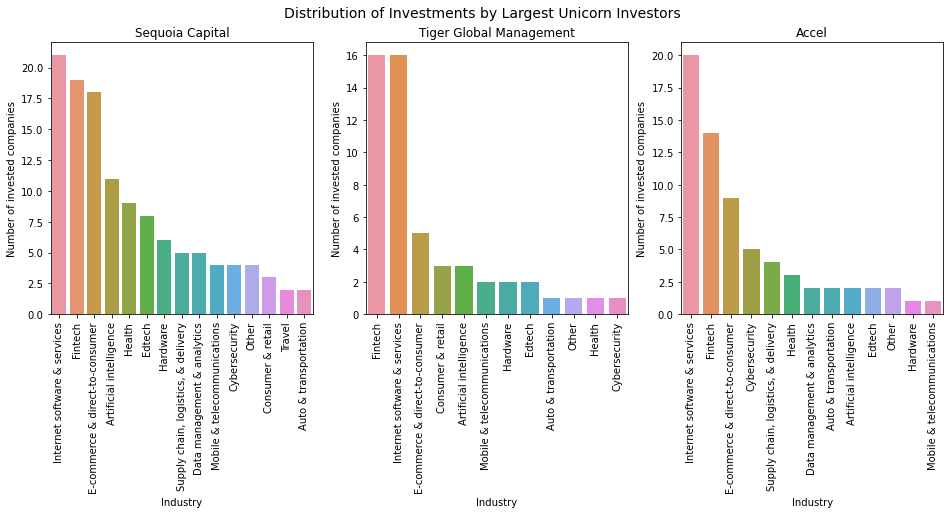

In [17]:
# Create 3 bar plots for the distribution of investments by industry for each top unicorn investors.

# Create a 1x3 plot figure
fig, axes = plt.subplots(1, 3, figsize = (16,5))

# Setting a variable to count which axis the plot should go on
idx = 0

# Loop through a list of the three top unicorn investors
for c in ['Sequoia Capital', 'Tiger Global Management','Accel']:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Industry
    companies_sample = companies_sample['Industry'].value_counts()

    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set x-axis label
    axes[idx].set_xlabel("Industry")

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes to the next plot
    idx +=1

# Set the title of the whole plot
plt.suptitle('Distribution of Investments by Largest Unicorn Investors', fontsize = 14);

**Question: What do we notice about the industries invested in by each top unicorn investor?**

The three industries most commonly invested in by the top unicorn investors are: internet software and services, fintech, and e-commerce and direct-to-consumer.

Other insights include:
* Sequoia Capital is the only top unicorn investor to invest in travel unicorns.
* Tiger Global Management is the only top unicorn investor to not invest in supply chain and logistics.
* Accel has invested in more cybersecurity unicorns than Sequoia Capital and Tiger Global Management.

### Continents 

Create a visualization that shows the continents of the unicorns invested in by the top three unicorn investors.

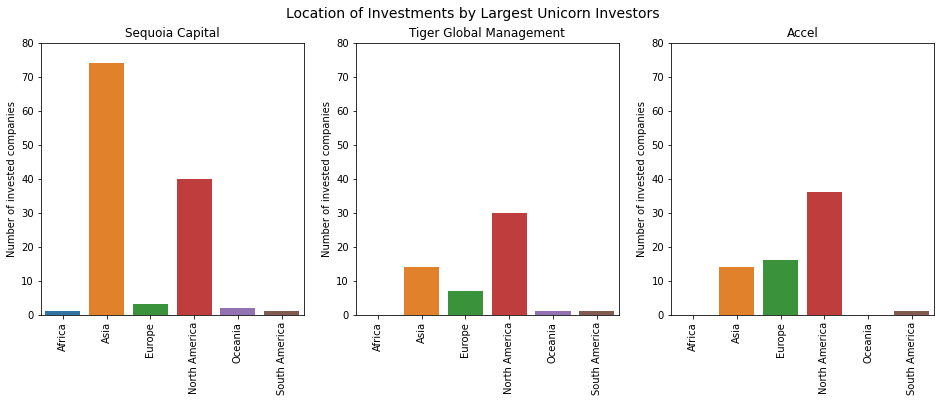

In [18]:
# Visualize the continents invested in by the top three unicorn investors.

# Create a 1x3 plot figure
fig, axes = plt.subplots(1, 3, figsize = (16,5))

# Setting a variable to count which axis the plot should go on
idx = 0

# Loop through a list of the three top unicorn investors
for c in ['Sequoia Capital', 'Tiger Global Management', 'Accel']:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Continent
    companies_sample = companies_sample['Continent'].value_counts()
    
    # Add Oceania as index with value 0 if not present in companies_sample
    if 'Oceania' not in companies_sample.index:
        companies_sample['Oceania'] = 0
        
    # Add Africa as index with value 0 if not present companies_sample
    if 'Africa' not in companies_sample.index:
        companies_sample['Africa'] = 0
        
    # Sort the index so the x axis for all plot is in alphabetical order
    companies_sample = companies_sample.sort_index()
    
    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set y range so all plots have same range
    axes[idx].set(ylim=(0, 80))

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes ot the next plot
    idx +=1

# Set the title of the whole plot
plt.suptitle('Location of Investments by Largest Unicorn Investors', fontsize = 14);

**Question: What do we notice about the continents invested in by each top unicorn investor?**

Sequoia Capital has a much stronger focus on unicorn companies in Asia than the other investors. The majority of unicorns invested in by Tiger Global Management and Accel are in North America.

Sequoia Capital is the only investor that invested in a unicorn company in Africa. Accel is the only investor to not have any unicorn company investments in Oceania.

## Step 4: Results and evaluation

My client wants to know if there are particular investment strategies for the three large unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. Therefore, consider how we would present the findings and whether the business will find that information insightful.

### Calculate the average `Years to Unicorn` 

In [19]:
# Compute the mean Years to Unicorn for unicorn companies invested in by Sequoia Capital.

print('Mean Years to Unicorn for Sequoia Capital:')
print(companies[companies['Sequoia Capital']==1]['Years To Unicorn'].mean())


# Compute the mean Years to Unicorn for unicorn companies invested in by Tiger Global Management.

print('Mean Years to Unicorn for Tiger Global Management:')
print(companies[companies['Tiger Global Management']==1]['Years To Unicorn'].mean())


# Compute the mean Years to Unicorn for unicorn companies invested in by Accel.

print('Mean Years to Unicorn for Accel:')
print(companies[companies['Accel']==1]['Years To Unicorn'].mean())

Mean Years to Unicorn for Sequoia Capital:
6.570247933884297
Mean Years to Unicorn for Tiger Global Management:
7.264150943396227
Mean Years to Unicorn for Accel:
6.895522388059701


**Question: Of the three top unicorn investors, which has the shortest average `Years to Unicorn`?**

On average, the companies invested in by Sequoia Capital reached unicorn status faster than those invested in by Tiger Global Management and Accel. They average 6.6 years between founding and reaching unicorn status.

### Find the three companies with the highest `Valuation` 

In [20]:
# Sort companies by Valuation in descending order

companies = companies.sort_values(by = 'Valuation', ascending=False)


# Calculate the 3 companies with the highest valuation invested in by Sequoia Capital.

print('Highest valued unicorns invested in by Sequoia Capital:')

print(companies[companies['Sequoia Capital']==1]['Company'].values[:3])


# Calculate the 3 companies with the highest valuation invested in by Tiger Global Management. 

print('Highest valued unicorns invested in by Tiger Global Management:')

print(companies[companies['Tiger Global Management']==1]['Company'].values[:3])


# Calculate the 3 companies with the highest valuation invested in by Accel. 

print('Highest valued unicorns invested in by Accel:')

print(companies[companies['Accel']==1]['Company'].values[:3])

Highest valued unicorns invested in by Sequoia Capital:
['Bytedance' 'SHEIN' 'Klarna']
Highest valued unicorns invested in by Tiger Global Management:
['SHEIN' 'Checkout.com' 'JUUL Labs']
Highest valued unicorns invested in by Accel:
['Miro' 'goPuff' 'Celonis']


**Question: What are the three companies with the highest `Valuation` invested in by each of the top three unicorn investors?**

The investments with the highest valuation by Sequoia Capital are Bytedance, SHEIN, and Klarna. The investments with the highest valuation by Tiger Global Management are SHEIN, Checkout.com, and JUUL Labs. The investments with the highest valuation by Accel are Miro, goPuff, and Celonis.

**Question: Why might it be helpful to provide the business with examples of the unicorns invested in by the top three unicorn investors?**

It will help them gain context for the types of companies the top unicorn investment firms invest in.

### Determine if the three companies invest simultaneously

In [21]:
# Find companies invested in by two or more top unicorn investors.
# Create a new column that counts the number of investments by the top three unicorn investors
companies['Big 3 Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']

# Create a new DataFrame that only includes companies with 2 or more investments by the top three unicorn investors
top_companies = companies[companies['Big 3 Investors'] >= 2]

# Create a list of the companies in top_companies
top_companies_list = companies[companies['Big 3 Investors'] >= 2]['Company'].values

# Display the results
print('Number of unicorns with two or more of the Big 3 Investors: ')
print(len(top_companies_list))

print('Companies')
print(top_companies_list)

Number of unicorns with two or more of the Big 3 Investors: 
18
Companies
['SHEIN' 'Getir' 'Razorpay' 'DJI Innovations' 'Ola Cabs' 'CRED'
 'ChargeBee Technologies' 'Ironclad' 'Groww' 'Infra.Market' 'Ethos'
 'Zetwerk' 'CoinSwitch Kuber' 'Veriff' 'Zenoti' 'Vedantu'
 'Five Star Business Finance' 'CaptivateIQ']


**Question: Do the top three investors invest in the same unicorn companies? If so, how often?**

There are 18 companies invested in by two of three unicorn investment firms at any given time: SHEIN, Getir, and Razorpay.

## Conclusion

**What are some key takeaways that you learned during this lab?**

* Input validation is essential for ensuring data is high quality and error-free.
* In practice, input validation requires trial and error to identify issues and determine the best way to fix them.
* There are benefits and disadvantages to both label encoding and one hot encoding.
* The decision to use label encoding versus one hot encoding needs to be made on a case-by-case basis.

**What summary would you provide to stakeholders? Consider industries represented, locations, speed to unicorn status, simultaneous investments, and overall value.**

* Sequoia Capital, Tiger Global Management, and Accel invest in several industries, but the majority of investments are in internet software and services, fintech, and e-commerce and direct-to-consumer companies.
* Sequoia Capital has a stronger focus on unicorn companies in Asia than the other top unicorn investors. The majority of unicorns invested in by Tiger Global Management and Accel are in North America.
* The companies invested in by Sequoia Capital reached unicorn status faster than those invested in by Tiger Global Management and Accel, at an average of 6.6 years between founding and reaching unicorn status.
* There are 18 companies invested in simultaneously by two of the top three unicorn investment firms.
* The highest-valued unicorns invested in by Sequoia Capital are Bytedance, SHEIN, and Klarna. The highest-valued unicorns invested in by Tiger Global Management are SHEIN, Checkout.com, and JUUL Labs. The highest-valued unicorns invested in by Accel are Miro, goPuff, and Celonis.
 



**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

